# Define functions

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def fit_line(x_fit, y_fit):
    x_array = np.array(x_fit)
    y_array = np.array(y_fit)
    a, b = np.polyfit(x_array, y_array, 1)
    return a, b, x_array

def init(model, density):
    global simfiles_folder, tempfolders_loc, temp_foldernames, temps_str, temps, exentrfile_name, save_to_density, save_to_master, density_global, model_global
    density_global = density
    model_global = model
    
    simfiles_folder = "simfiles"
    tempfolders_loc = f"./{model}/D{density}/{simfiles_folder}"
    temp_foldernames = os.listdir(tempfolders_loc)
    temps_str = [i[1:] for i in temp_foldernames]
    temps = [float(i[1:]) for i in temp_foldernames]
    

    try:
        exentrfile_name = [i for i in os.listdir(f"./{model}/D{density}") if i[:15] == 'free_energy_rho'][0]
    except:
        print("no entropy file")
        exentrfile_name = None

    #/{temp}/{run}/{kind}

    save_to_density = f""
    save_to_master = f"./master_plots/"

    def titlemaker(model, density, run, kind = '', temp_str = 'all'):
        return plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
    # return simfiles_folder, tempfolders_loc, temp_foldernames, temps_str, temps, exentrfile_name, save_to_density, save_to_master

# Diffusion coef, S_ex calculations

In [38]:
model = "KA824"
density = "1.15"

# runs = ["run-1", "run-2", "run-3"]
simfiles_folder = "simfiles"
tempfolders_loc = f"./{model}/D{density}/{simfiles_folder}"
temp_foldernames = os.listdir(tempfolders_loc)
temps_str = [i[1:] for i in temp_foldernames]
temps = [float(i[1:]) for i in temp_foldernames]

try:
    exentrfile_name = [i for i in os.listdir(f"./{model}/D{density}") if i[:15] == 'free_energy_rho'][0]
except:
    print("no entropy file")

#/{temp}/{run}/{kind}

save_to_density = f""
save_to_master = f"./master_plots/"

def titlemaker(model, density, run, kind = '', temp_str = 'all'):
    return plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
        

In [39]:
#diffusion coefficient calculations

results_df = pd.DataFrame(columns=["temp", "diff_coef"])
kind = "msd"

for temp_str in temps_str:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
        # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
        a_fit, b_fit, x_fit = fit_line(df[0][22:], df[1][22:]) # fit the line
        temp_diff_df = pd.DataFrame({'temp':[float(temp_str)], 'diff_coef':[a_fit]})
        results_df = pd.concat([results_df, temp_diff_df], ignore_index=True)

        # plt.yscale("log")
        # plt.xscale("log")
        # plt.plot(df[0], df[1], color = "green") #plots the dataframe's given columns
        # plt.plot(x_fit, a_fit*x_fit+b_fit, color = 'tab:red', linewidth=1) # plot the fitted line
        # titlemaker(model, density, run, kind, temp_str)
        # plt.xlabel("Time")
        # plt.ylabel("$r^2$")

        # plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")
        # plt.show()
        # plt.clf() #clears the plotter memory so plot's dont's overlap unintentionally
        # break
    # break

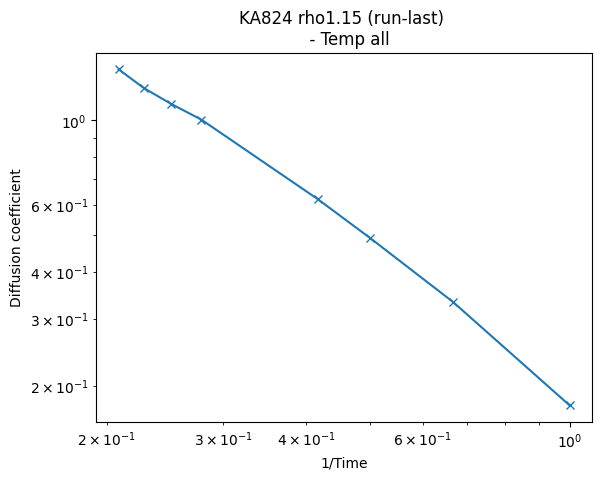

In [40]:
# DIFF COEF OVER 1/Temperature
results_df
results_df['1/temp'] = 1/results_df['temp']

titlemaker(model, density, run)
plt.xlabel("1/Time")
plt.ylabel("Diffusion coefficient")
plt.yscale("log")
plt.xscale("log")
plt.plot(results_df['1/temp'], results_df['diff_coef'], marker='x')

In [41]:
# REDUCED DIFF COEF

Kb = 1.0
rho = 1.2
reduced_diff = []

# diffcoef*rho^1/3(1/kb*t)^1/2

results_df["red_diff"] = results_df['diff_coef']*(rho**(1/3))*(((1/(Kb*results_df['temp']))**(1/2)))

In [42]:
#EXCESS ENTROPY

exentr_df = pd.DataFrame(np.loadtxt(f"./{model}/D{density}/{exentrfile_name}"))

#drop temperatures:
# results_df = results_df.drop([0])

exentr = []
for temp in results_df['temp']:
    exentr.append(exentr_df.loc[exentr_df[0] == temp][5].values[0])
results_df['S_ex'] = exentr

In [43]:
results_df

,temp,diff_coef,1/temp,red_diff,S_ex
0,1.0,0.177775,1.000000,0.188914,-3.627201
1,1.5,0.332711,0.666667,0.288679,-3.169709
2,2.0,0.489753,0.500000,0.368007,-2.881138
3,2.4,0.620146,0.416667,0.425385,-2.712724
4,3.6,1.004892,0.277778,0.562810,-2.374533
5,4.0,1.105602,0.250000,0.587439,-2.294392
6,4.4,1.217608,0.227273,0.616843,-2.224733
7,4.8,1.363170,0.208333,0.661185,-2.163005


In [44]:
# save results_df
results_df.to_csv(f"{model}_D{density}_results.csv")

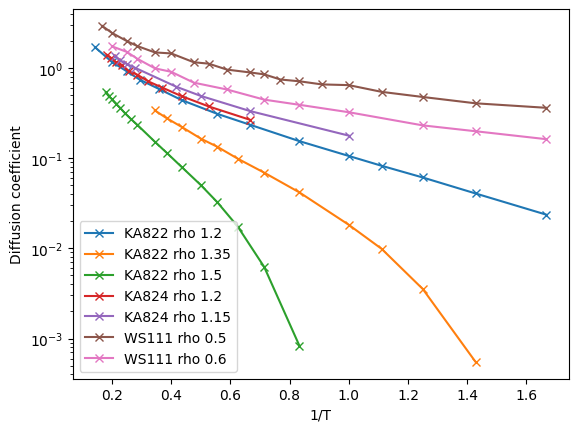

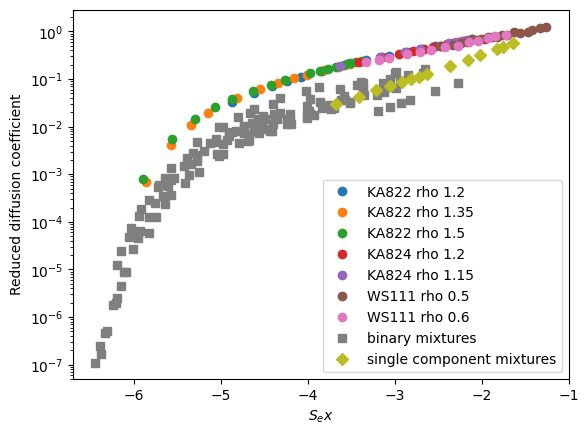

In [49]:
KA822_D12 = pd.read_csv("KA822_D1.2_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA822_D135 = pd.read_csv("KA822_D1.35_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA822_D15 = pd.read_csv("KA822_D1.5_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA824_D12 = pd.read_csv("KA824_D1.2_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA824_D115 = pd.read_csv("KA824_D1.15_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
WS111_D05 = pd.read_csv("WS111_D0.5_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
WS111_D06 = pd.read_csv("WS111_D0.6_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])

binary = pd.read_csv("binary_results.csv", usecols=["S_EX", "D_A"])
single = pd.read_csv("single_results.csv", usecols=["S_EX", "D_A"])


plt.xlabel("1/T")
plt.ylabel("Diffusion coefficient")
plt.yscale('log')
# plt.xscale('log')
# plt.title()
plt.plot(KA822_D12["1/temp"], KA822_D12["diff_coef"], marker = 'x', label = 'KA822 rho 1.2')
plt.plot(KA822_D135["1/temp"], KA822_D135["diff_coef"], marker = 'x', label = 'KA822 rho 1.35')
plt.plot(KA822_D15["1/temp"], KA822_D15["diff_coef"], marker = 'x', label = 'KA822 rho 1.5')
plt.plot(KA824_D12["1/temp"], KA824_D12["diff_coef"], marker = 'x', label = 'KA824 rho 1.2')
plt.plot(KA824_D115["1/temp"], KA824_D115["diff_coef"], marker = 'x', label = 'KA824 rho 1.15')
plt.plot(WS111_D05["1/temp"], WS111_D05["diff_coef"], marker = 'x', label = 'WS111 rho 0.5')
plt.plot(WS111_D06["1/temp"], WS111_D06["diff_coef"], marker = 'x', label = 'WS111 rho 0.6')
plt.legend()
plt.show()


plt.xlabel("$S_ex$")
plt.ylabel("Reduced diffusion coefficient")
plt.yscale('log')
# plt.xscale('log')
plt.plot(KA822_D12["S_ex"], KA822_D12["red_diff"], marker = 'o', label = 'KA822 rho 1.2', linestyle = 'None')
plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = 'o', label = 'KA822 rho 1.35', linestyle = 'None')
plt.plot(KA822_D15["S_ex"], KA822_D15["red_diff"], marker = 'o', label = 'KA822 rho 1.5', linestyle = 'None')
plt.plot(KA824_D12["S_ex"], KA824_D12["red_diff"], marker = 'o', label = 'KA824 rho 1.2', linestyle = 'None')
plt.plot(KA824_D115["S_ex"], KA824_D115["red_diff"], marker = 'o', label = 'KA824 rho 1.15', linestyle = 'None')
plt.plot(WS111_D05["S_ex"], WS111_D05["red_diff"], marker = 'o', label = 'WS111 rho 0.5', linestyle = 'None')
plt.plot(WS111_D06["S_ex"], WS111_D06["red_diff"], marker = 'o', label = 'WS111 rho 0.6', linestyle = 'None')

plt.plot(binary["S_EX"], binary["D_A"], marker = 's', label = 'binary mixtures', linestyle = 'None')
plt.plot(single["S_EX"], single["D_A"], marker = 'D', label = 'single component mixtures', linestyle = 'None')
plt.legend()
# plt.show()

plt.savefig("plots_to_overleaf/D-S_ex_i.png")